<h1 style="color:blue; font-size: 30px; font-weight:bold;">Setting the Environment &darr;</h1>

<h2 style="font-size: 20px; font-weight:bold;">
    Import the needed packages
</h2>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kprototypes import KPrototypes
import plotly.express as px
from scipy.stats.mstats import winsorize
from pathlib import Path

<h2 style="font-size: 20px; font-weight:bold;">
    Define the needed functions and static variables 
</h2>

In [29]:
def CSVToPandasDataFrame(pathFileName, delimiter, low_memory=False):
    data = pd.read_csv(pathFileName, sep=delimiter, low_memory=low_memory)
    return pd.DataFrame(data)

def getLevel(position):
    if "Sr." in position or "Senior" in position:
        return 'Senior'
    elif "Manager" in position:
        return 'Manager'
    elif "Director" in position:
        return 'Director'
    elif "CEO" in position or 'CIO' in position or "President" in position:
        return 'C-Level'
    else:
        return 'Junior-Experienced'

def createIfNotExist(dir):
    path = Path(dir)
    if not path.exists():
        path.mkdir(parents=True)
    return dir

repositoryLink = r'https://raw.githubusercontent.com/prof-apartida/data-exercises/main/'
outputFiguresPath = createIfNotExist('Output/Figures/')
clustersOutputPath = createIfNotExist('Output/Clusters/')

<h2 style="font-size: 20px; font-weight:bold;">
    Reading HR dataset from GitHub repository 
</h2>

In [30]:
fileName = 'HR_people_analytics.csv'
HRData = CSVToPandasDataFrame(
    pathFileName = repositoryLink + fileName, 
    delimiter=','
)
HRData.head(10)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


<h1 style="color:blue; font-size: 30px; font-weight:bold;">
    Data Exploring &darr;
</h1>

<h2 style="font-size: 20px; font-weight:bold;">
    Locating nulls values
</h2>

In [31]:
HRData.isna().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

<h2 style="font-size: 20px; font-weight:bold;">
    Check duplicated columns
</h2>

In [32]:
HRData.duplicated().any()

False

<h2 style="font-size: 20px; font-weight:bold;">
    Histograms for quantitative variables
</h2>

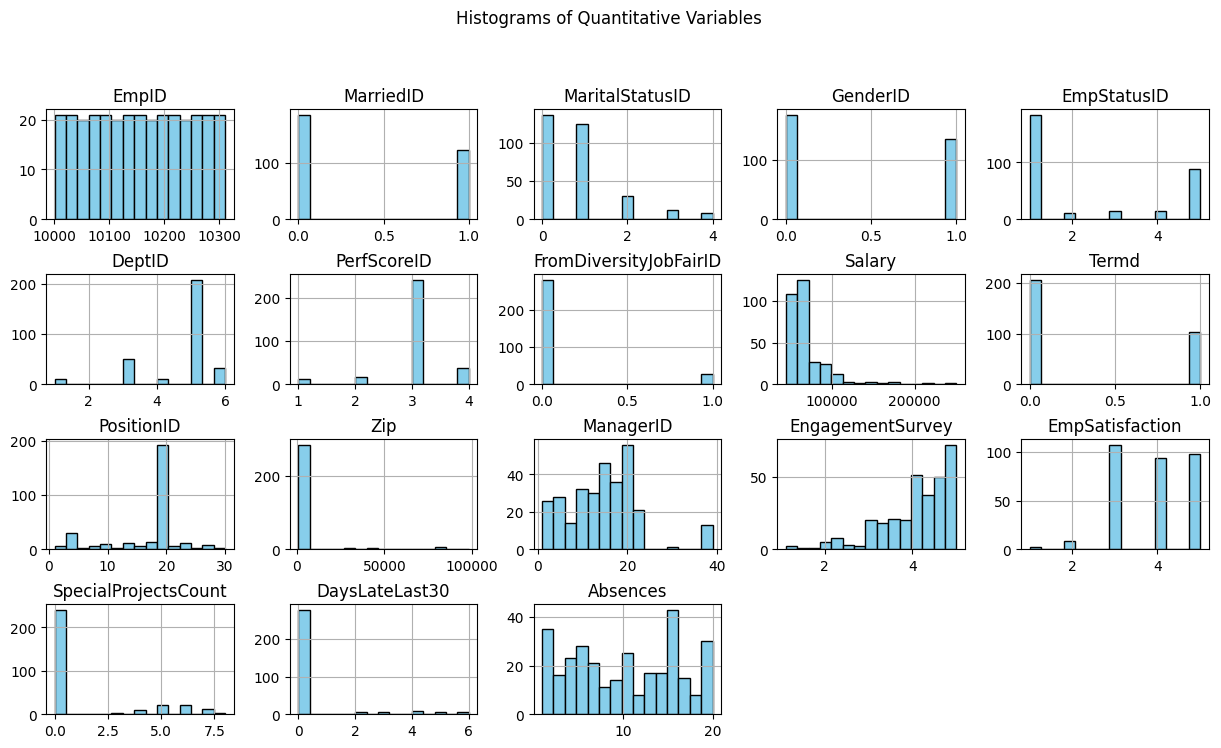

In [33]:
quantitative_columns = HRData.select_dtypes(include=['int64', 'float64']).columns
HRData[quantitative_columns].hist(bins=15, figsize=(15, 10), layout=(5, 5), color='skyblue', edgecolor='black')
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Histograms of Quantitative Variables')
plt.savefig(outputFiguresPath+'Histograms_Quantitative_Variables.png')
plt.show()

<h2 style="font-size: 20px; font-weight:bold;">
    Correlation matrix heatmap
</h2>

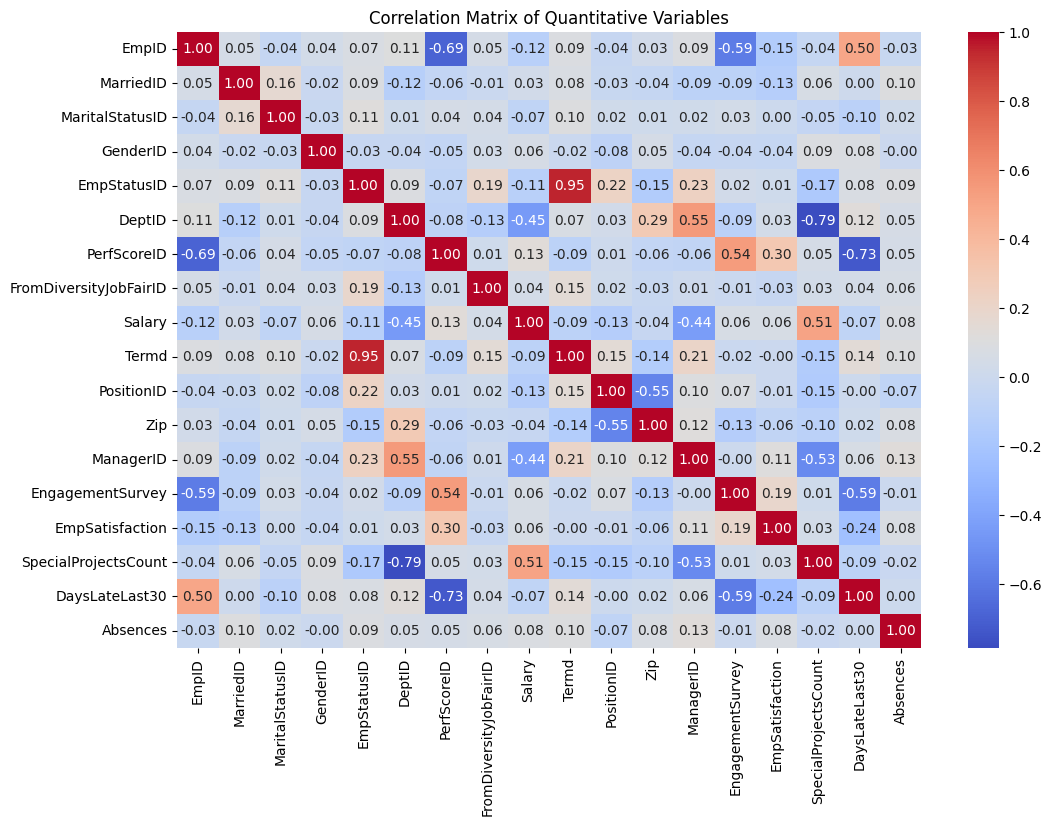

In [34]:
plt.figure(figsize=(12, 8))
sns.heatmap(HRData[quantitative_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Quantitative Variables')
plt.savefig(outputFiguresPath+'Correlatio_Matrix_Quantitative_Variables.png')
plt.show()


<h2 style="font-size: 20px; font-weight:bold;">
    Boxplot for salary distribution
</h2>

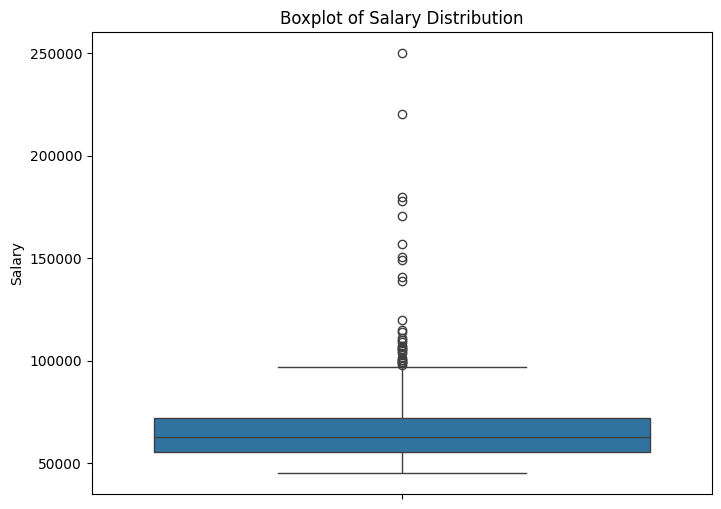

In [35]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=HRData['Salary'])  
plt.title('Boxplot of Salary Distribution')
plt.savefig(outputFiguresPath+'Boxplot_Salary_Distribution.png')
plt.show()

<h2 style="font-size: 20px; font-weight:bold;">
    Bar plot for performance scores distribution
</h2>

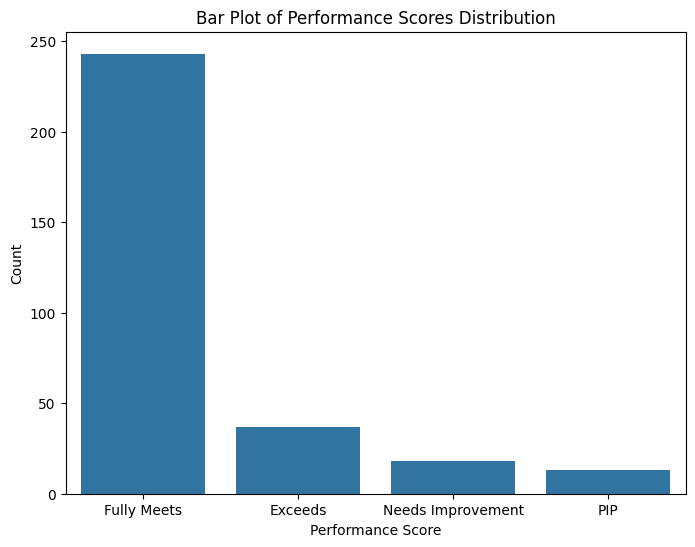

In [36]:
performance_score_column = 'PerformanceScore'  
performance_score_counts = HRData[performance_score_column].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=performance_score_counts.index, y=performance_score_counts.values)
plt.title('Bar Plot of Performance Scores Distribution')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.savefig(outputFiguresPath+'Boxplot_Performance_Scores_Distribution.png')
plt.show()

<h1 style="color:blue; font-size: 30px; font-weight:bold;">
    Data Cleaning &darr;
</h1>

<h2 style="font-size: 20px; font-weight:bold;">
    Drop any column that refer for uniqueness
</h2>

In [37]:
HRData.drop(
[
    'Employee_Name', 
    'EmpID', 
    'Zip', 
    'ManagerName', 
    'ManagerID'
], axis=1, inplace=True)

<h2 style="font-size: 20px; font-weight:bold;">
    Drop any duplicated column
</h2>

In [38]:
HRData.drop(
[
    'MaritalStatusID', #duplicated with MaritalDesc
    'MarriedID', #duplicated with MaritalDesc
    'GenderID', #duplicated with Sex
    'PositionID', #duplicated with Position
    'DeptID', #duplicated with Department
    'PerformanceScore', #duplicated with PerfScoreID
    'Termd', #related to EmploymentStatus
    'TermReason', #related to EmploymentStatus
    'FromDiversityJobFairID', #related to RecruitmentSource
    'DateofTermination' #related to LastPerformanceReview_Date
], axis=1, inplace=True)

<h2 style="font-size: 20px; font-weight:bold;">
    Drop columns with redundant values
</h2>

In [39]:
HRData.drop(
[
    'HispanicLatino', #Mostly No
    'CitizenDesc', #Mostly US Citizen
    'State', #Mostly from MA
    'RaceDesc' #Mostly White
], axis=1, inplace=True)

<h2 style="font-size: 20px; font-weight:bold;">
    Get Job Level from Position column and drop Position as it is misleading
</h2>

In [40]:
HRData['JobLevel'] = HRData['Position'].apply(getLevel)

uniquePairs = set(list(zip(HRData['JobLevel'], HRData['Position'])))
uniquePairsDF = pd.DataFrame(uniquePairs, columns=['JobLevel', 'Position'])
print(uniquePairsDF.sort_values(by='JobLevel'))

HRData.drop(['Position'], axis=1, inplace=True)

              JobLevel                      Position
11             C-Level               President & CEO
13             C-Level                           CIO
27            Director                   IT Director
4             Director                   BI Director
23            Director             Director of Sales
10            Director        Director of Operations
15  Junior-Experienced                    IT Support
28  Junior-Experienced                  Accountant I
26  Junior-Experienced              Network Engineer
19  Junior-Experienced          Enterprise Architect
18  Junior-Experienced                 Data Analyst 
16  Junior-Experienced                  Data Analyst
30  Junior-Experienced             Software Engineer
14  Junior-Experienced                Data Architect
31  Junior-Experienced      Principal Data Architect
9   Junior-Experienced                  BI Developer
3   Junior-Experienced      Production Technician II
7   Junior-Experienced      Administrative Ass

<h2 style="font-size: 20px; font-weight:bold;">
    Get AgeCategory from DOB column then drop it
</h2>

In [41]:
HRData['DOB'] = pd.to_datetime(HRData['DOB'], format='%m/%d/%y')
HRData['Age'] = abs(2019 - HRData['DOB'].dt.year)

HRData['AgeCategory'] = pd.cut(HRData['Age'], bins= [27, 31, 35, 40, 45, 51] , labels= ['Young Adult', 'Early Adult', 'Mid Adult', 'Late Adult', 'Senior']  , right=False)
print(HRData[['DOB', 'Age', 'AgeCategory']])

HRData.drop(['DOB','Age'], axis=1, inplace=True)

           DOB  Age  AgeCategory
0   1983-07-10   36    Mid Adult
1   1975-05-05   44   Late Adult
2   1988-09-19   31  Early Adult
3   1988-09-27   31  Early Adult
4   1989-09-08   30  Young Adult
..         ...  ...          ...
306 1985-05-11   34  Early Adult
307 1982-05-04   37    Mid Adult
308 1979-08-30   40   Late Adult
309 1979-02-24   40   Late Adult
310 1978-08-17   41   Late Adult

[311 rows x 3 columns]


<h2 style="font-size: 20px; font-weight:bold;">
    Get days of employment and drop DateofHire and LastPerformanceReview_Date columns then drop them
</h2>

In [42]:
HRData['DateofHire'] = pd.to_datetime(HRData['DateofHire'], format='%m/%d/%Y')
HRData['LastPerformanceReview_Date'] = pd.to_datetime(HRData['LastPerformanceReview_Date'], format='%m/%d/%Y')
HRData['EmploymentYears'] = HRData['LastPerformanceReview_Date'].dt.year - HRData['DateofHire'].dt.year 

print(HRData[['DateofHire', 'LastPerformanceReview_Date', 'EmploymentYears']])

HRData.drop(['DateofHire','LastPerformanceReview_Date'], axis=1, inplace=True)

    DateofHire LastPerformanceReview_Date  EmploymentYears
0   2011-07-05                 2019-01-17                8
1   2015-03-30                 2016-02-24                1
2   2011-07-05                 2012-05-15                1
3   2008-01-07                 2019-01-03               11
4   2011-07-11                 2016-02-01                5
..         ...                        ...              ...
306 2014-07-07                 2019-02-28                5
307 2008-09-02                 2015-09-02                7
308 2010-04-10                 2019-02-21                9
309 2015-03-30                 2019-02-01                4
310 2014-09-29                 2019-01-30                5

[311 rows x 3 columns]


<h2 style="font-size: 20px; font-weight:bold;">
    Handling Salary outliers by using Winsorization method
</h2>

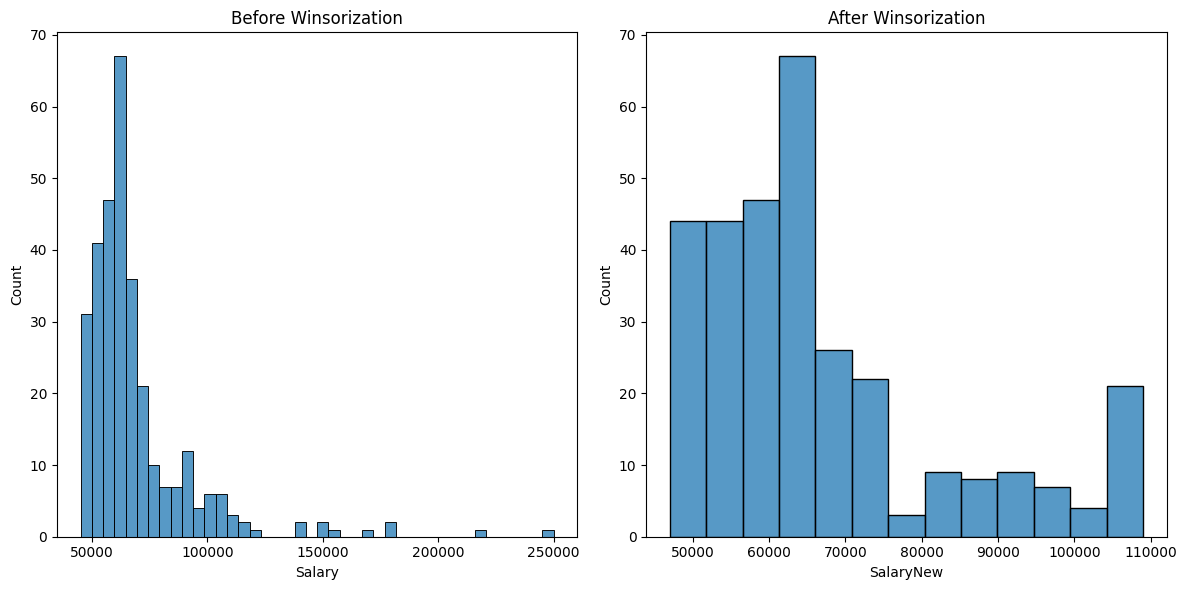

In [43]:
HRData['SalaryNew'] = winsorize(HRData['Salary'], limits=[0.05, 0.05])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(HRData['Salary'], ax=axs[0])
axs[0].set_title('Before Winsorization')
sns.histplot(HRData['SalaryNew'], ax=axs[1])
axs[1].set_title('After Winsorization')
plt.tight_layout()
plt.savefig(outputFiguresPath+'Salary_Distribution_Before_After_Winsorization.png')
plt.show()

HRData['Salary'] = HRData['SalaryNew']
HRData.drop(['SalaryNew'], axis=1, inplace=True)

<h1 style="color:blue; font-size: 30px; font-weight:bold;">
    Clustering the Data &darr;
</h1>

<h2 style="font-size: 20px; font-weight:bold;">
    Seprate the dataset into two types: categorical and numerical
</h2>

In [44]:
HRData[['EmpStatusID','PerfScoreID','EmpSatisfaction']] = \
HRData[['EmpStatusID','PerfScoreID','EmpSatisfaction']].astype('object')

categoricalColumns = list(HRData.select_dtypes(include=['object', 'category']).columns)
numericalColumns = list(HRData.select_dtypes(include=['float64', 'int64']).columns)
categericalColumnIndexes =list(HRData.columns.get_indexer_for(categoricalColumns))

HRData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   EmpStatusID           311 non-null    object  
 1   PerfScoreID           311 non-null    object  
 2   Salary                311 non-null    int64   
 3   Sex                   311 non-null    object  
 4   MaritalDesc           311 non-null    object  
 5   EmploymentStatus      311 non-null    object  
 6   Department            311 non-null    object  
 7   RecruitmentSource     311 non-null    object  
 8   EngagementSurvey      311 non-null    float64 
 9   EmpSatisfaction       311 non-null    object  
 10  SpecialProjectsCount  311 non-null    int64   
 11  DaysLateLast30        311 non-null    int64   
 12  Absences              311 non-null    int64   
 13  JobLevel              311 non-null    object  
 14  AgeCategory           311 non-null    category
 15  Employ

<h2 style="font-size: 20px; font-weight:bold;">
    Utilizing the Elbow method to determine the optimal number of clusters (k) to be used in k-prototype
</h2>

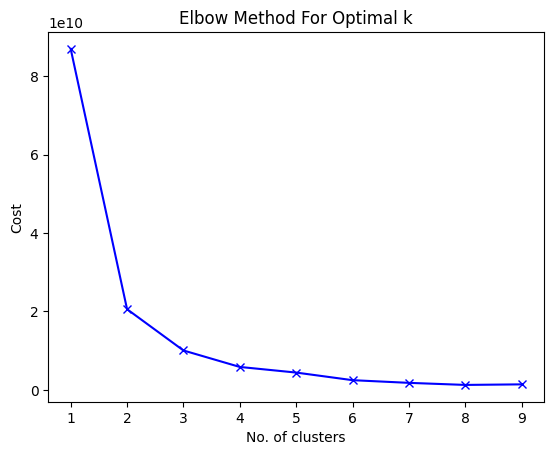

In [45]:
cost=[]
K = range(1,10)
for num_clusters in list(K):
    kproto = KPrototypes(n_clusters=num_clusters, init='random', n_init = 1, n_jobs=4)
    kproto.fit_predict(HRData, categorical= categericalColumnIndexes)
    cost.append(kproto.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.savefig(outputFiguresPath+'Elbow_Method_10_Runs.png')
plt.show()

<h2 style="font-size: 20px; font-weight:bold;">
    Cluster the dataset into three groups by using K-Prototype unsupervised algorithm
</h2>

In [46]:
kproto = KPrototypes(n_clusters=3, init = "random", n_init = 5, verbose=0)
clusters = kproto.fit_predict(HRData, categorical=categericalColumnIndexes)
HRData['Cluster'] = clusters
HRData.head(10)

,EmpStatusID,PerfScoreID,Salary,Sex,MaritalDesc,EmploymentStatus,Department,RecruitmentSource,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,JobLevel,AgeCategory,EmploymentYears,Cluster
0,1,4,62506,M,Single,Active,Production,LinkedIn,4.60,5,0,0,1,Junior-Experienced,Mid Adult,8,1
1,5,3,104437,M,Married,Voluntarily Terminated,IT/IS,Indeed,4.96,3,6,0,17,Senior,Late Adult,1,2
2,5,3,64955,F,Married,Voluntarily Terminated,Production,LinkedIn,3.02,3,0,0,3,Junior-Experienced,Early Adult,1,1
3,1,3,64991,F,Married,Active,Production,Indeed,4.84,5,0,0,15,Junior-Experienced,Early Adult,11,1
4,5,3,50825,F,Divorced,Voluntarily Terminated,Production,Google Search,5.00,4,0,0,2,Junior-Experienced,Young Adult,5,0
5,1,4,57568,F,Single,Active,Production,LinkedIn,5.00,5,0,0,15,Junior-Experienced,Late Adult,7,0
6,1,3,95660,F,Single,Active,Software Engineering,LinkedIn,3.04,3,4,0,19,Junior-Experienced,Late Adult,5,2
7,1,3,59365,M,Widowed,Active,Production,Employee Referral,5.00,4,0,0,19,Junior-Experienced,Mid Adult,6,0
8,3,3,47837,F,Single,Active,Production,Diversity Job Fair,4.46,3,0,0,4,Junior-Experienced,Senior,10,0
9,1,3,50178,M,Divorced,Active,IT/IS,Indeed,5.00,5,6,0,16,Junior-Experienced,Early Adult,4,0


<h1 style="color:blue; font-size: 30px; font-weight:bold;">
    Cluster Analysis &darr;
</h1>

<h2 style="font-size: 20px; font-weight:bold;">
    Visualize the clusters counts
</h2>

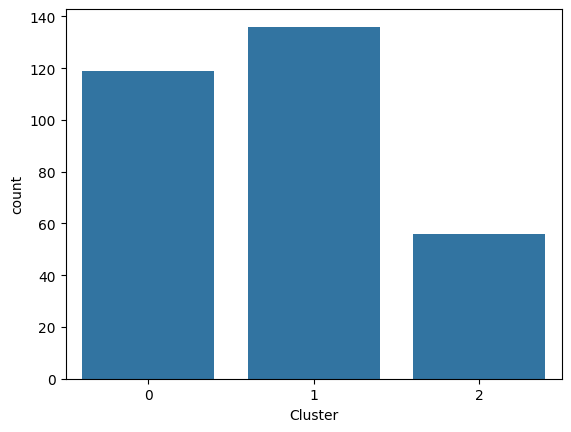

In [47]:
sns.countplot(x='Cluster', data=HRData)
plt.savefig(outputFiguresPath+'HR_Clusters_Counts.png')
plt.show()


<h2 style="font-size: 20px; font-weight:bold;">
    Display centroids
</h2>

In [48]:
centroidsDF = pd.DataFrame(kproto.cluster_centroids_, columns= list(numericalColumns + categoricalColumns))
centroidsDF

,Salary,EngagementSurvey,SpecialProjectsCount,DaysLateLast30,Absences,EmploymentYears,EmpStatusID,PerfScoreID,Sex,MaritalDesc,EmploymentStatus,Department,RecruitmentSource,EmpSatisfaction,JobLevel,AgeCategory
0,53102.02521008404,4.0585714285714305,0.37815126050420167,0.5462184873949579,9.974789915966387,5.050420168067227,1,3,F,Single,Active,Production,LinkedIn,4,Junior-Experienced,Senior
1,66184.66176470589,4.1391911764705895,0.5441176470588235,0.3897058823529412,10.389705882352942,5.029411764705882,1,3,F,Single,Active,Production,Indeed,3,Junior-Experienced,Mid Adult
2,98019.94642857143,4.1483928571428565,4.642857142857143,0.19642857142857142,10.428571428571429,4.160714285714286,1,3,M,Married,Active,IT/IS,Indeed,3,Junior-Experienced,Early Adult


<h2 style="color:purple; font-size: 20px; font-weight:bold;">
  Let's label the three clusters
</h2>

<ul style="color:grey;">
  <li><strong style="color:green;">Cluster 1:</strong> Senior-Level Performers</li>
  <li><strong style="color:green;">Cluster 2:</strong> Mid-Level Performers</li>
  <li><strong style="color:green;">Cluster 3:</strong> High-Level Performers</li>
</ul>

<h2 style="color:purple; font-size: 20px; font-weight:bold;">
  Characterizing the three clusters
</h2>

<ul style="color:grey;">
  <li>
    <strong style="color:green;">Salary: </strong> 
    Cluster 3 (High-Level Performers) has the highest average salary, indicating employees in this cluster are generally better compensated compared to the other two clusters. Cluster 2 (Mid-Level Performers) has the lowest average salary among the three clusters.
  </li>
   <li>
    <strong style="color:green;">Engagement and Performance: </strong> 
    Employees in Cluster 3 (High-Level Performers) and Cluster 1 (Senior-Level Performers) seem to be more engaged, as reflected in their higher engagement survey scores compared to Cluster 2 (Mid-Level Performers). This suggests that employees in these clusters might be more satisfied and committed to their work.
  </li>
   <li>
    <strong style="color:green;">Work Performance: </strong> 
    Cluster 3 (High-Level Performers) stands out with a higher number of special projects completed, indicating these employees are likely more involved in additional tasks or responsibilities beyond their regular duties. Cluster 2 (Mid-Level Performers) has the lowest count of special projects among the three clusters.
  </li>
   <li>
    <strong style="color:green;">Punctuality: </strong> 
    Employees in Cluster 3 (High-Level Performers) are the most punctual, with very few instances of being late in the last 30 days, while employees in Cluster 2 (Mid-Level Performers) are the least punctual among the three clusters.
  </li>
   <li>
    <strong style="color:green;">Attendance: </strong> 
    Cluster 2 (Mid-Level Performers) has the lowest average absences, suggesting employees in this cluster tend to have better attendance records compared to the other two clusters.
  </li>
  <li>
    <strong style="color:green;">Experience: </strong> 
    Cluster 2 (Mid-Level Performers) has slightly more experienced employees in terms of years of employment compared to the other clusters, while Cluster 3 (High-Level Performers) has the least experienced employees.
  </li>
  <li>
    <strong style="color:green;">Marital Status: </strong> 
    Cluster 3 (High-Level Performers) primarily consists of married employees, whereas Clusters 1 and 2 are mostly comprised of single individuals.
  </li>
  <li>
    <strong style="color:green;">Department: </strong> 
    Cluster 3 (High-Level Performers) is predominantly composed of employees from the IT/IS department, while Clusters 1 and 2 are mostly from the production department.
  </li>
  <li>
    <strong style="color:green;">Recruitment Source: </strong> 
    Cluster 2 (Mid-Level Performers) has a higher proportion of employees recruited via LinkedIn, while Clusters 1 and 3 have more employees recruited through Indeed.
  </li>
  <li>
    <strong style="color:green;">Job Level: </strong> 
    Cluster 2 (Mid-Level Performers) primarily comprises senior employees, while Clusters 1 and 3 consist of mid-adult to middle-aged employees.
  </li>
</ul>

<h2 style="font-size: 20px; font-weight:bold;">
    The graph below illustrates that IT positions are the highest paid.
</h2>

In [50]:
fig = px.scatter(HRData, x="Salary", y="Department", color="Cluster", title="Cluster by K prototypes", hover_data=["Sex", "JobLevel"])
#fig.write_image(outputFiguresPath+'Scatter_Salary_vs_Department.png')
fig.show()

<h2 style="font-size: 20px; font-weight:bold;">
    Save the dataset with the clustering and the Centriods
</h2>

In [ ]:
centroidsDF.to_csv(clustersOutputPath+'Centroids.csv', sep=',', index=False) 
HRData.to_csv(clustersOutputPath+'HR-Analysis-Clusters.csv', sep=',', index=False) 

<h1>Todo List</h1>
<ul> 
  <li>More graphs to show the clustering analysis points</li>
  <li>Insert my information and let the model predict in which cluster I belong</li>
  <li>Prepare presentation</li>
</ul>
   

In [ ]:
'''
myInformation = pd.DataFrame({})
newCluster = kproto.predict(new_entry, categorical=[0])
'''

'\nmyInformation = pd.DataFrame({})\nnewCluster = kproto.predict(new_entry, categorical=[0])\n'